# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners          int64
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object 

0


<Axes: xlabel='Seats', ylabel='Density'>

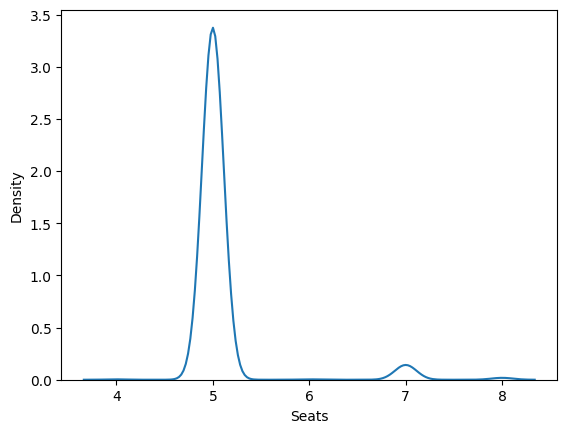

In [208]:
#Q1 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cars1 = pd.read_csv('/Users/borayadiul/Desktop/labs/04_hedonic_pricing/cars_hw.csv')
cars1.describe()
#print(cars1.dtypes, '\n')


cars1['No_of_Owners']=cars1['No_of_Owners'].replace('1st', '1')
cars1['No_of_Owners']=cars1['No_of_Owners'].replace('2nd', '2')
cars1['No_of_Owners']=cars1['No_of_Owners'].replace('3rd', '3')
cars1['No_of_Owners'] = pd.to_numeric(cars1['No_of_Owners'])
#cars1.head()
print(cars1.dtypes, '\n')
cars1 = cars1.rename(columns = {'Seating_Capacity': "Seats", "No_of_Owners": "Num_Owners", "Mileage_Run" : "Mileage"})
cars1.head()

cars2 = cars1.loc[:,['Make', "Make_Year", "Color", "Body_Type", "Mileage", "Num_Owners", "Seats", "Fuel_Type", "Transmission","Transmission_Type", "Price"]]
cars2.head()

print(cars2.isnull().values.any().sum())

cars2.describe()

sns.kdeplot(data=cars2, x='Seats')


In [ ]:
sns.kdeplot(data=cars2, x='Num_Owners')


In [ ]:
sns.kdeplot(data=cars2, x='Make_Year')

In [ ]:
sns.kdeplot(data=cars2, x='Mileage')

In [ ]:
sns.kdeplot(data=cars2, x='Price')

In [ ]:
sns.kdeplot(data=cars2, x='Make_Year', hue = "Make")

In [ ]:
cars2.groupby('Make')['Price'].describe()

In [ ]:
sns.scatterplot(x=cars2['Mileage'],y=cars2['Price'])

In [ ]:
sns.boxplot(data=cars2)

In [232]:
# Q2 

make_dum = pd.get_dummies(cars2['Make'])
color_dum = pd.get_dummies(cars2['Color'])
body_dum = pd.get_dummies(cars2['Body_Type'])
fuel_dum = pd.get_dummies(cars2['Fuel_Type'])
transmis_dum = pd.get_dummies(cars2['Transmission'])
transmisType_dum = pd.get_dummies(cars2['Transmission_Type'])

cars2['Mileage_arcsin'] = np.arcsinh(cars2['Mileage'])
cars2['Price_arcsin'] = np.arcsinh(cars2['Price'])
cars2.head()


X = pd.concat([make_dum,color_dum,body_dum,fuel_dum,transmis_dum,transmisType_dum,cars2],axis=1)
X.head()
#list(X.columns)





,Chevrolet,Datsun,Ford,Honda,Hyundai,Jeep,Kia,MG Motors,Mahindra,Maruti Suzuki,...,Body_Type,Mileage,Num_Owners,Seats,Fuel_Type,Transmission,Transmission_Type,Price,Mileage_arcsin,Price_arcsin
0,False,False,False,False,False,False,False,False,False,False,...,sedan,44611,1,5,diesel,7-Speed,Automatic,657000,11.398883,14.088586
1,False,False,False,False,True,False,False,False,False,False,...,crossover,20305,1,5,petrol,5-Speed,Manual,682000,10.611770,14.125932
2,False,False,False,True,False,False,False,False,False,False,...,suv,29540,2,5,petrol,5-Speed,Manual,793000,10.986648,14.276726
3,False,False,False,False,False,False,False,False,False,False,...,hatchback,35680,1,5,petrol,5-Speed,Manual,414000,11.175493,13.626768
4,False,False,False,False,True,False,False,False,False,False,...,hatchback,25126,1,5,petrol,5-Speed,Manual,515000,10.824806,13.845069


In [ ]:
sns.scatterplot(data=cars2,x='Mileage_arcsin', y = 'Price_arcsin')




In [206]:
cars2.head()

,Make,Make_Year,Color,Body_Type,Mileage,Num_Owners,Seats,Fuel_Type,Transmission,Transmission_Type,Price,Mileage_arcsin,Price_arcsin
443,Hyundai,2017,red,suv,57167,1,5,petrol,6-Speed,Manual,1064000,11.646879,14.570693
869,Maruti Suzuki,2021,grey,hatchback,15836,1,5,petrol,5-Speed,Manual,520000,10.363188,13.854731
229,Hyundai,2017,silver,suv,44894,1,5,diesel,6-Speed,Manual,1235000,11.405207,14.719729
439,Hyundai,2019,white,suv,26198,1,5,petrol,6-Speed,Automatic,1274000,10.866586,14.750819
30,Maruti Suzuki,2011,red,hatchback,79565,1,5,petrol,5-Speed,Manual,237000,11.977477,13.068963


In [226]:
#Q3
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Y = cars2['Price']
X = cars2.loc[:, ['Mileage', 'Body_Type', 'Make_Year', 'Transmission_Type', 'Seats']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=100)

L_train = len(y_train)
L_test = len(y_test)



In [227]:
#Q4 
from sklearn.linear_model import LinearRegression

C_train = pd.concat([X_train["Mileage"],X_train["Make_Year"],pd.get_dummies(X_train['Body_Type'], dtype='int'), pd.get_dummies(X_train['Transmission_Type'],dtype='int')],  axis = 1)
C_test = pd.concat([X_test["Mileage"],X_test["Make_Year"],pd.get_dummies(X_test['Body_Type'], dtype='int'), pd.get_dummies(X_test['Transmission_Type'],dtype='int')],  axis = 1)

reg = LinearRegression(fit_intercept=False).fit(C_train, y_train) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

y_hat = reg.predict(C_test)
print('R-squared: ', reg.score(C_test, y_test)) # R squared measure

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results


R-squared:  0.6494796259326348
RMSE:  219384.76582353507


,variable,coefficient
0,Mileage,-9.471889e-02
1,Make_Year,5.034212e+04
2,crossover,-2.887584e+07
3,hatchback,-2.897749e+07
4,muv,-2.894977e+07
5,sedan,-2.872284e+07
6,suv,-2.844800e+07
7,Automatic,-7.196554e+07
8,Manual,-7.200839e+07


In [228]:
#Q4 
from sklearn.linear_model import LinearRegression

F_train = pd.concat([X_train["Mileage"], pd.get_dummies(X_train['Transmission_Type'],dtype='int')],  axis = 1)
F_test = pd.concat([X_test["Mileage"], pd.get_dummies(X_test['Transmission_Type'],dtype='int')],  axis = 1)

reg1 = LinearRegression(fit_intercept=False).fit(F_train, y_train) # Fit the linear model
results = pd.DataFrame({'variable':reg1.feature_names_in_, 'coefficient': reg1.coef_}) # Regression coefficients

y_hat = reg1.predict(F_test)
print('R-squared: ', reg1.score(F_test, y_test)) # R squared measure

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results

R-squared:  0.05047951011324625
RMSE:  361078.8111571295


,variable,coefficient
0,Mileage,-2.484690
1,Automatic,936138.624781
2,Manual,805854.608598


**Q4**

When looking at the models that I created, it seems that they both did relatively poorly. I would say that the first model, with Mileage, Make_Year, Body_Type, and Tranmission_Type did better than the model with just Mileage and Tranmission_Type as it did have a lower RMSE (219,384) meaning it may be slighty better model and it had a higher R-sqaure  (0.649) indicating a better model fit. 

In [ ]:
#Q5 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Y1 = X['Price']
X2 = X.loc[:, ['Mileage_arcsin', 'Body_Type', 'Make_Year', 'Transmission_Type', 'Seats']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=100)

L_train = len(y_train)
L_test = len(y_test)


In [262]:
y1 = X['Price']
X['Num_ownXseats'] = X['Num_Owners'].astype('str')+'X'+X['Seats'].astype('str')
x1 = X.loc[:,['Num_ownXseats', "Mileage_"] ]

X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=.2, random_state=100)
R_train = pd.concat([X_train['Mileage_arcsin'],  pd.get_dummies(X_train['Num_ownXseats'],dtype='int')],  axis = 1)
R_test = pd.concat([X_train['Mileage_arcsin'], pd.get_dummies(X_test['Num_ownXseats'],dtype='int')],  axis = 1)


In [267]:
R_test

,Mileage,1X5,1X7,1X8,2X5,2X7,3X5
103,72356.0,NaN,NaN,NaN,NaN,NaN,NaN
100,28831.0,NaN,NaN,NaN,NaN,NaN,NaN
518,56762.0,NaN,NaN,NaN,NaN,NaN,NaN
630,30234.0,NaN,NaN,NaN,NaN,NaN,NaN
436,36822.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
25,NaN,1.0,0.0,0.0,0.0,0.0,0.0
390,NaN,1.0,0.0,0.0,0.0,0.0,0.0
685,NaN,1.0,0.0,0.0,0.0,0.0,0.0
205,NaN,0.0,0.0,0.0,1.0,0.0,0.0


In [264]:

reg5 = linear_model.LinearRegression(fit_intercept=False).fit(R_train,y_train)
y_hat = reg5.predict(R_test)
print('Rsq: ', reg5.score(R_test,y_test)) # R2
#rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
#print('RMSE: ', rmse) # R2
#results = pd.DataFrame({'variable':reg5.feature_names_in_, 'coefficient': reg5.coef_}) # Regression coefficients
#results

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- 1X4
- 1X6
- 2X8


In [236]:
X

,Chevrolet,Datsun,Ford,Honda,Hyundai,Jeep,Kia,MG Motors,Mahindra,Maruti Suzuki,...,Mileage,Num_Owners,Seats,Fuel_Type,Transmission,Transmission_Type,Price,Mileage_arcsin,Price_arcsin,MileXBody
0,False,False,False,False,False,False,False,False,False,False,...,44611,1,5,diesel,7-Speed,Automatic,657000,11.398883,14.088586,sedanX44611
1,False,False,False,False,True,False,False,False,False,False,...,20305,1,5,petrol,5-Speed,Manual,682000,10.611770,14.125932,crossoverX20305
2,False,False,False,True,False,False,False,False,False,False,...,29540,2,5,petrol,5-Speed,Manual,793000,10.986648,14.276726,suvX29540
3,False,False,False,False,False,False,False,False,False,False,...,35680,1,5,petrol,5-Speed,Manual,414000,11.175493,13.626768,hatchbackX35680
4,False,False,False,False,True,False,False,False,False,False,...,25126,1,5,petrol,5-Speed,Manual,515000,10.824806,13.845069,hatchbackX25126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,False,False,False,False,True,False,False,False,False,False,...,23869,1,5,petrol,6-Speed,Automatic,956000,10.773483,14.463660,sedanX23869
972,False,False,False,False,True,False,False,False,False,False,...,14831,1,5,petrol,6-Speed,Automatic,1027000,10.297622,14.535300,sedanX14831
973,False,False,False,False,True,False,False,False,False,False,...,52846,1,5,petrol,4-Speed,Automatic,736000,11.568284,14.202133,sedanX52846
974,False,False,True,False,False,False,False,False,False,False,...,28335,2,5,diesel,5-Speed,Automatic,749000,10.945000,14.219641,crossoverX28335


In [ ]:
Z_train = pd.concat([X_train['Review Scores Rating'], 
                    pd.get_dummies(X_train['nbhdXroom'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['nbhdXroom'], dtype='int')],
                    axis = 1)

In [266]:
print(reg5)

LinearRegression(fit_intercept=False)
